In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Comparing OpenAi LLM with MistralAI LLM

We begin by finding the number of rows to get a statistical significant result.

In [ ]:
# get the number of rows in the data
paths_finished = pd.read_csv('data:/paths_finished_unique.tsv', sep='\t', skiprows=1, names=['path_id', 'hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
print('Number of rows in paths_finished:', paths_finished.shape[0])

Number of rows in paths_finished: 28718


In [9]:
# The runing of mistral is way longer that openai (limited by the rate limit)
# as the data is too large, we can calculate the necessary number of rows using the Z-score
# Z-score = 1.96 for 95% confidence interval
# margin of error = 5%
# population proportion = 0.5
Z = 1.96
margin_of_error = 0.05
p = 0.5
n = (Z**2 * p * (1-p)) / margin_of_error**2
print('Number of rows needed:', n)

Number of rows needed: 384.1599999999999


Using the Z-score, for a 95% confidence interval, the minimum number of rows needed to get a statistical significant result is 385. We therefore take randomly 565 rows from the dataset.

In [3]:
# Load the merged_file_mistral.tsv file
# Load the TSV file
file_path = "data/merged_file_final_mistral.tsv"
df_mistral = pd.read_csv(file_path, sep="\t")


In [4]:
# load the data/llm_paths.tsv file
# Load the TSV file
file_path = "data/llm_paths_all_gpt4omini_no_memory.tsv"
df_openai = pd.read_csv(file_path, sep="\t")

In [5]:
# print the number of rows in the df_openai DataFrame
num_rows = df_openai.shape[0]
print(f"Number of rows in the file: {num_rows}")

# print the number of rows in the df_mistral DataFrame
num_rows = df_mistral.shape[0]
print(f"Number of rows in the file: {num_rows}")    

Number of rows in the file: 28718
Number of rows in the file: 565


In [6]:
# get only the rows in the openai file that have the same path_id as the mistral file
# get the path_ids from the mistral file
mistral_path_ids = df_mistral["path_id"]

# filter the openai file based on the path_ids
df_openai = df_openai[df_openai["path_id"].isin(mistral_path_ids)]

In [7]:
# get only the rows in the mistral file that have the same path_id as the openai file
# get the path_ids from the openai file
openai_path_ids = df_openai["path_id"]

# filter the mistral file based on the path_ids
df_mistral = df_mistral[df_mistral["path_id"].isin(openai_path_ids)]


In [8]:
# get the number of rows in the filtered openai file
num_rows_filtered = df_openai.shape[0]
print(f"Number of rows in the filtered file: {num_rows}")

# get the number of rows in the filtered mistral file
num_rows_filtered = df_mistral.shape[0]
print(f"Number of rows in the filtered file: {num_rows}")

Number of rows in the filtered file: 565
Number of rows in the filtered file: 565


In [10]:
# check if the path of each row contain the string "WRONG_ANSWER"
df_openai_WA = df_openai[df_openai['path'].str.contains("WRONG_ANSWER")]
df_mistral_WA = df_mistral[df_mistral['path'].str.contains("WRONG_ANSWER")]

# get the number of rows in the df_openai_WA and df_mistral_WA DataFrames
num_rows_openai_WA = df_openai_WA.shape[0]
num_rows_mistral_WA = df_mistral_WA.shape[0]

# get the pourcentage of wrong answers 
pourcentage_openai_WA = (num_rows_openai_WA/num_rows)*100
pourcentage_mistral_WA = (num_rows_mistral_WA/num_rows)*100

print(f"Pourcentage of wrong answers in the OpenAI file: {pourcentage_openai_WA}%")
print(f"Pourcentage of wrong answers in the Mistral file: {pourcentage_mistral_WA}%")

Pourcentage of wrong answers in the OpenAI file: 4.95575221238938%
Pourcentage of wrong answers in the Mistral file: 32.92035398230089%


In [11]:
# check if the path of each row contain the string "LOOP_DETECTED"
df_openai_LD = df_openai[df_openai['path'].str.contains("LOOP_DETECTED")]
df_mistral_LD = df_mistral[df_mistral['path'].str.contains("LOOP_DETECTED")]

# get the number of rows in the df_openai_LD and df_mistral_LD DataFrames
num_rows_openai_LD = df_openai_LD.shape[0]
num_rows_mistral_LD = df_mistral_LD.shape[0]

# get the pourcentage of loop detected
pourcentage_openai_LD = (num_rows_openai_LD/num_rows)*100
pourcentage_mistral_LD = (num_rows_mistral_LD/num_rows)*100

print(f"Pourcentage of loop detected in the OpenAI file: {pourcentage_openai_LD}%")
print(f"Pourcentage of loop detected in the Mistral file: {pourcentage_mistral_LD}%")

Pourcentage of loop detected in the OpenAI file: 39.823008849557525%
Pourcentage of loop detected in the Mistral file: 14.513274336283185%


Pourcentage of finished paths in the OpenAI file: 55.2212389380531%
Pourcentage of finished paths in the Mistral file: 52.56637168141592%


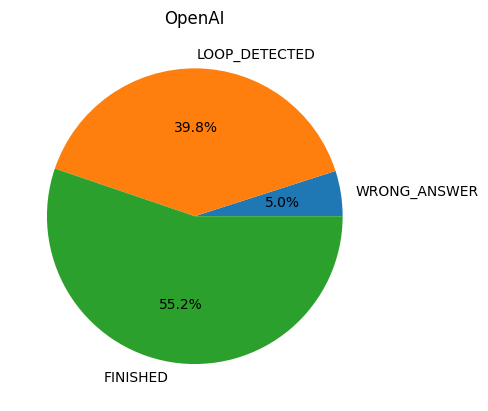

Text(0.5, 1.0, 'Mistral')

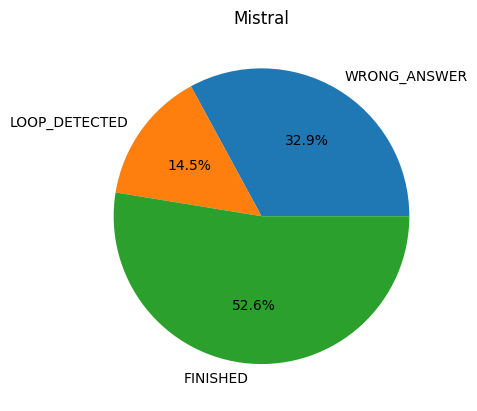

In [12]:
# the number of finished paths is therefore all the other paths
num_rows_openai_finished = num_rows_filtered - num_rows_openai_WA - num_rows_openai_LD
num_rows_mistral_finished = num_rows_filtered - num_rows_mistral_WA - num_rows_mistral_LD

# get the pourcentage of finished paths
pourcentage_openai_finished = (num_rows_openai_finished/num_rows_filtered)*100
pourcentage_mistral_finished = (num_rows_mistral_finished/num_rows_filtered)*100

print(f"Pourcentage of finished paths in the OpenAI file: {pourcentage_openai_finished}%")
print(f"Pourcentage of finished paths in the Mistral file: {pourcentage_mistral_finished}%")

# plot 2 piechart to show the results
labels = ['WRONG_ANSWER', 'LOOP_DETECTED', 'FINISHED']
sizes_openai = [pourcentage_openai_WA, pourcentage_openai_LD, pourcentage_openai_finished]
sizes_mistral = [pourcentage_mistral_WA, pourcentage_mistral_LD, pourcentage_mistral_finished]
fig, ax = plt.subplots()
ax.pie(sizes_openai, labels=labels, autopct='%1.1f%%')
ax.set_title('OpenAI')
plt.show()
fig, ax = plt.subplots()
ax.pie(sizes_mistral, labels=labels, autopct='%1.1f%%')
ax.set_title('Mistral')

We can see that for both llm the success rate is similar. However, openai tends to loop more and mistralai tends to give more wrong answers. This can show differents digital minds.

In [13]:
# get the percentage of unfinished paths in the openai file
num_rows_openai = df_openai.shape[0]

# the unfinished paths are the paths that contains the string "LOOP_DETECTED" or "WRONG_ANSWER"
df_openai_unfinished = df_openai[df_openai['path'].str.contains("LOOP_DETECTED|WRONG_ANSWER")]
num_rows_openai_unfinished = df_openai_unfinished.shape[0]
pourcentage_openai_unfinished = (num_rows_openai_unfinished/num_rows_openai)*100
print(f"Pourcentage of unfinished paths in the OpenAI file: {pourcentage_openai_unfinished}%")

Pourcentage of unfinished paths in the OpenAI file: 44.7787610619469%


In [14]:
# get the percentage of unfinished paths in the mistral file
num_rows_mistral = df_mistral.shape[0]

# the unfinished paths are the paths that contains the string "LOOP_DETECTED" or "WRONG_ANSWER"
df_mistral_unfinished = df_mistral[df_mistral['path'].str.contains("LOOP_DETECTED|WRONG_ANSWER")]
num_rows_mistral_unfinished = df_mistral_unfinished.shape[0]

pourcentage_mistral_unfinished = (num_rows_mistral_unfinished/num_rows_mistral)*100
print(f"Pourcentage of unfinished paths in the Mistral file: {pourcentage_mistral_unfinished}%")

Pourcentage of unfinished paths in the Mistral file: 47.43362831858407%


In [15]:
df_mistral_finished = df_mistral[~df_mistral['path'].str.contains("LOOP_DETECTED|WRONG_ANSWER")]
df_openai_finished = df_openai[~df_openai['path'].str.contains("LOOP_DETECTED|WRONG_ANSWER")]

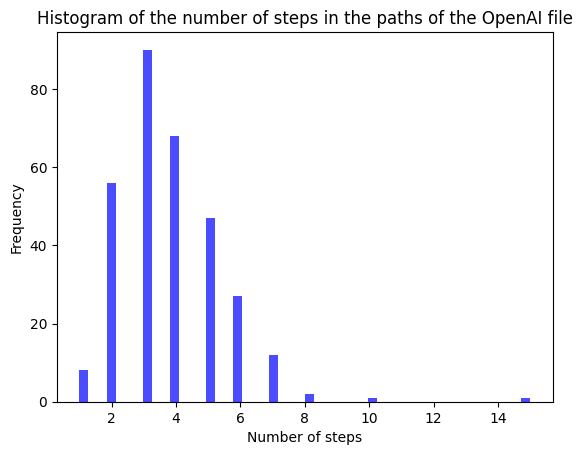

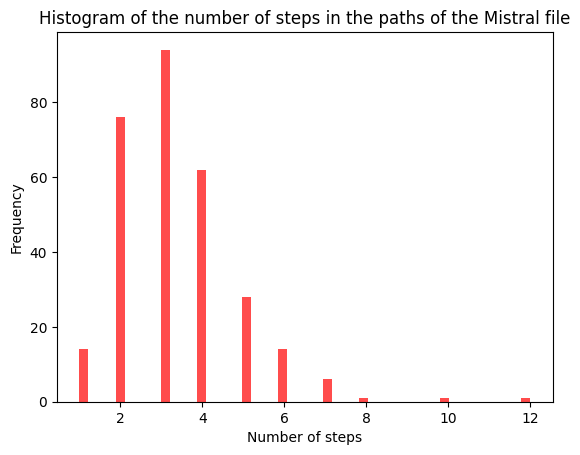

In [16]:
# we want to compare the number of steps in the paths of the openai and mistral files (column steps)


# plot the histogram of the number of steps in the paths of the openai file

plt.hist(df_openai_finished['steps'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.title('Histogram of the number of steps in the paths of the OpenAI file')
plt.show()

# plot the histogram of the number of steps in the paths of the mistral file
plt.hist(df_mistral_finished['steps'], bins=50, color='red', alpha=0.7)
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.title('Histogram of the number of steps in the paths of the Mistral file')
plt.show() 

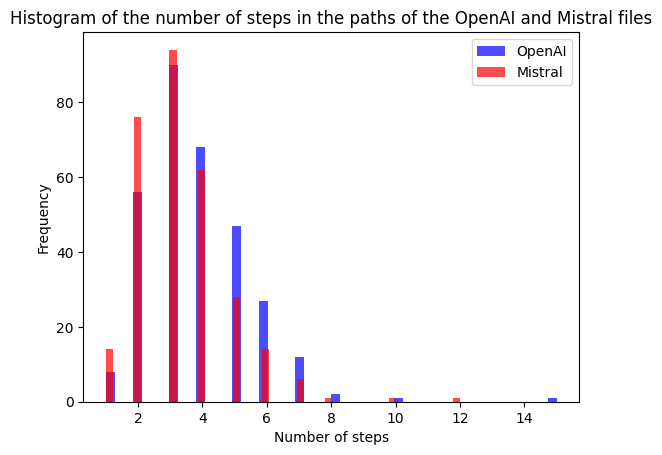

In [17]:
# compare the 2 graphs above
plt.hist(df_openai_finished['steps'], bins=50, color='blue', alpha=0.7, label='OpenAI')
plt.hist(df_mistral_finished['steps'], bins=50, color='red', alpha=0.7, label='Mistral')
plt.xlabel('Number of steps')
plt.ylabel('Frequency')
plt.title('Histogram of the number of steps in the paths of the OpenAI and Mistral files')
plt.legend()
plt.show() 

In [18]:
# describe the steps column of the openai file
df_openai['steps'].describe()


count    565.000000
mean       2.095575
std        2.242734
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: steps, dtype: float64

In [19]:
# describe the steps column of the mistral file
df_mistral['steps'].describe()

count    565.000000
mean       1.755752
std        1.984110
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: steps, dtype: float64

In [20]:
import urllib.parse
# load categories.tsv file
# Load the TSV file
file_path = "data/wikispeedia_paths-and-graph/categories.tsv"
categories = pd.read_csv(file_path, sep='\t', skiprows=12, names=['article', 'category'])
categories = categories.map(urllib.parse.unquote)


In [28]:

articles_openai = df_openai['path'].apply(lambda x: x.split(';')).tolist()

articles_openai = [item for sublist in articles_openai for item in sublist]

# get the cartegoies of the articles
categories_of_articles_openai = []
for article in articles_openai:
    try:
        categories_of_articles_openai.append(categories[categories['article'] == article]['category'])
    except:
        pass

# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_openai = [item for sublist in categories_of_articles_openai for item in sublist]
categories_count_openai = pd.Series(categories_of_articles_openai).value_counts()

# print the 5 most common categories
print(categories_count_openai.head())
nbr_o = categories_count_openai.quantile(0.70)

subject.Countries                                          369
subject.History.General_history                            204
subject.Geography.European_Geography.European_Countries    138
subject.Citizenship.Politics_and_government                125
subject.Geography.North_American_Geography                 106
Name: count, dtype: int64


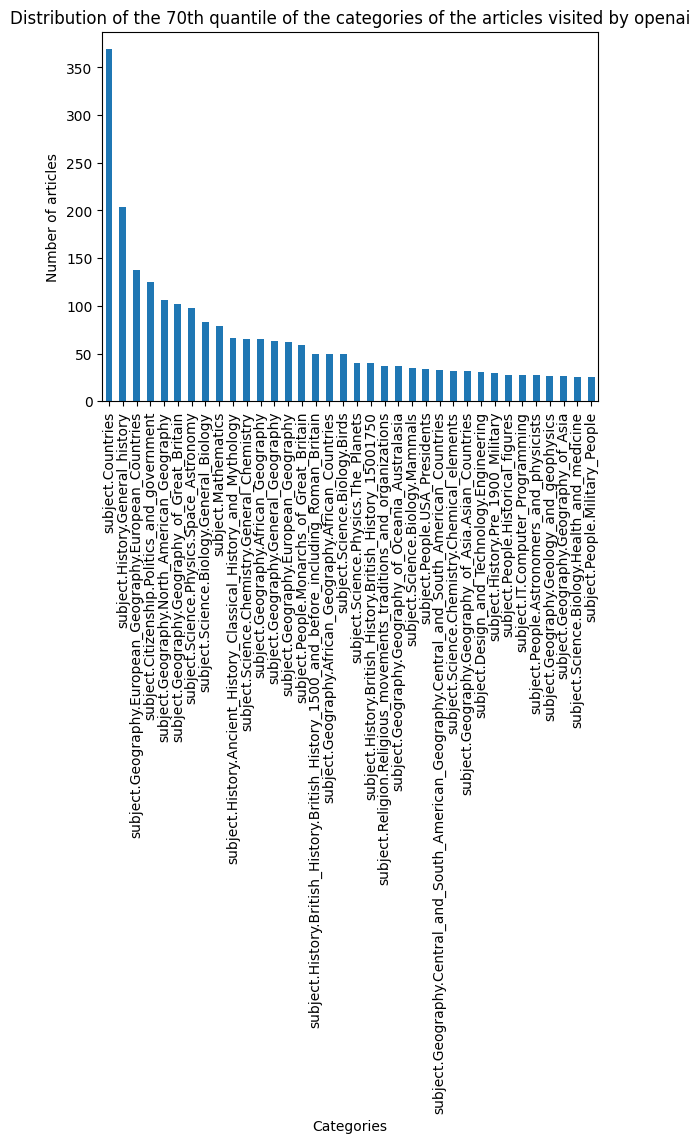

In [29]:
# plot the distribution of the 70th quantile
categories_count_openai[categories_count_openai > nbr_o].plot(kind='bar')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by openai')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.show()

In [30]:

articles_mistral = df_mistral['path'].apply(lambda x: x.split(';')).tolist()

articles_mistral = [item for sublist in articles_mistral for item in sublist]

# get the cartegoies of the articles
categories_of_articles_mistral = []
for article in articles_mistral:
    try:
        categories_of_articles_mistral.append(categories[categories['article'] == article]['category'])
    except:
        pass

# using the value counts, get the 0.70 quantile of the categories
categories_of_articles_mistral = [item for sublist in categories_of_articles_mistral for item in sublist]
categories_count_mistral = pd.Series(categories_of_articles_mistral).value_counts()

# print the 5 most common categories
print(categories_count_mistral.head())
nbr_m = categories_count_mistral.quantile(0.70)

subject.Countries                                          290
subject.Geography.European_Geography.European_Countries    119
subject.Geography.North_American_Geography                 100
subject.Geography.Geography_of_Great_Britain                99
subject.History.General_history                             89
Name: count, dtype: int64


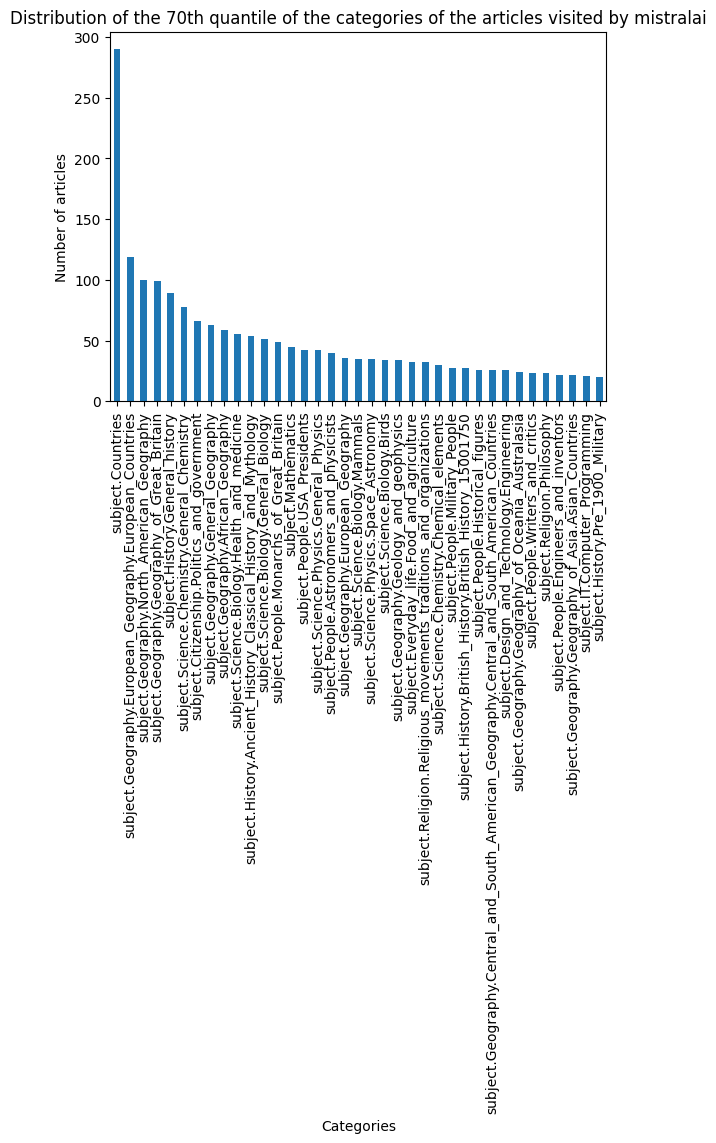

In [31]:
# plot the distribution of the 70th quantile
categories_count_mistral[categories_count_mistral > nbr_m].plot(kind='bar')
plt.title('Distribution of the 70th quantile of the categories of the articles visited by mistralai')
plt.ylabel('Number of articles')
plt.xlabel('Categories')
plt.show()

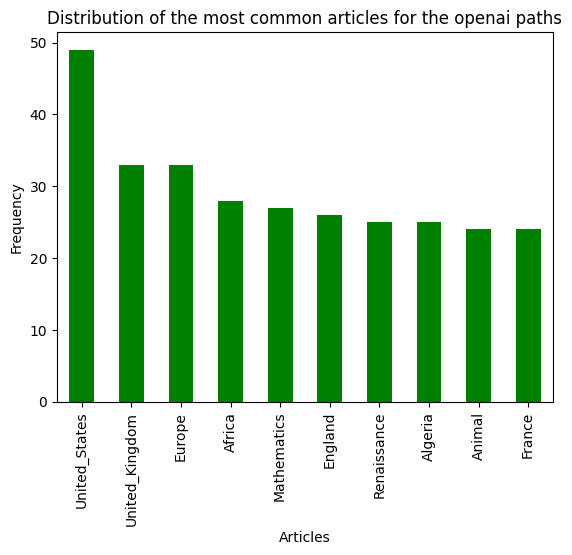

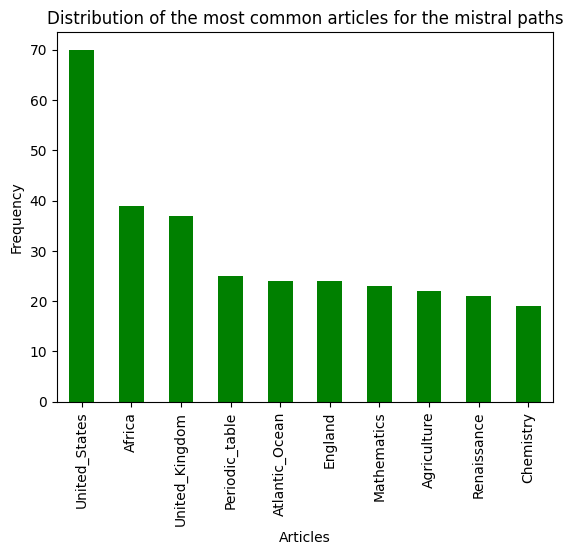

In [25]:

# drop the loop_detected and wrong_answer articles
articles_openai = [article for article in articles_openai if article not in ['LOOP_DETECTED', 'WRONG_ANSWER']]


# Plot the distribution of the most common articles
articles_count_openai = pd.Series(articles_openai)
articles_count_openai = articles_count_openai.value_counts()
articles_count_openai = articles_count_openai.sort_values(ascending=False)
articles_count_openai = articles_count_openai[:10]
articles_count_openai.plot(kind='bar', color='green')
plt.title('Distribution of the most common articles for the openai paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()


# drop the loop_detected and wrong_answer articles
articles_mistral = [article for article in articles_mistral if article not in ['LOOP_DETECTED', 'WRONG_ANSWER']]



# Plot the distribution of the most common articles
articles_count_mistral = pd.Series(articles_mistral)
articles_count_mistral = articles_count_mistral.value_counts()
articles_count_mistral = articles_count_mistral.sort_values(ascending=False)
articles_count_mistral = articles_count_mistral[:10]
articles_count_mistral.plot(kind='bar', color='green')
plt.title('Distribution of the most common articles for the mistral paths')
plt.xlabel('Articles')
plt.ylabel('Frequency')
plt.show()

